In [28]:
import numpy as np
import pandas as pd

In [52]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [53]:
import matplotlib.pyplot as plt

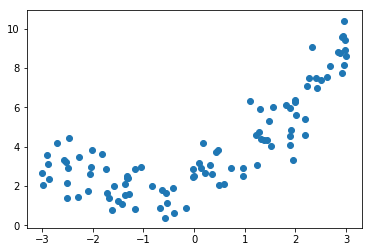

In [54]:
plt.scatter(X,y)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
x_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.31949906]), array([[0.93734838, 0.43876575]]))

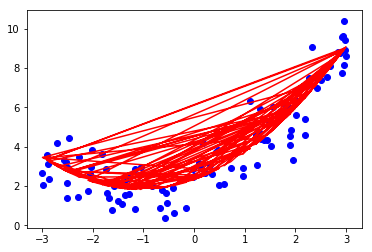

In [62]:
plt.scatter(X, y, color="blue")
plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)), color = 'red')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

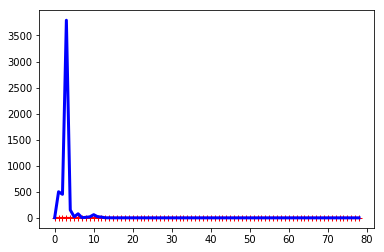

In [68]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ("lin_reg", LinearRegression())))
plot_learning_curves(polynomial_regression, X, y)